In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [10]:
# Load the dataset
data = pd.read_csv('synthesized_data.csv')

In [11]:
# Extract input and output columns
X = data[['Min_Temperature', 'Max_Temperature', 'Min_Rainfall', 'Max_Rainfall', 'Temperature', 'Rainfall']]
y = data['Price']

In [12]:
# Normalize the input features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalize the output
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(np.array(y).reshape(-1, 1))

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [14]:
# Define the SVR model
svr = SVR(kernel='rbf')

# Train the model
svr.fit(X_train, y_train)

/home/samarth5854/anaconda3/envs/PsycheSail/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [15]:
# Make predictions
y_pred = svr.predict(X_test)

In [16]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.17352738395911485


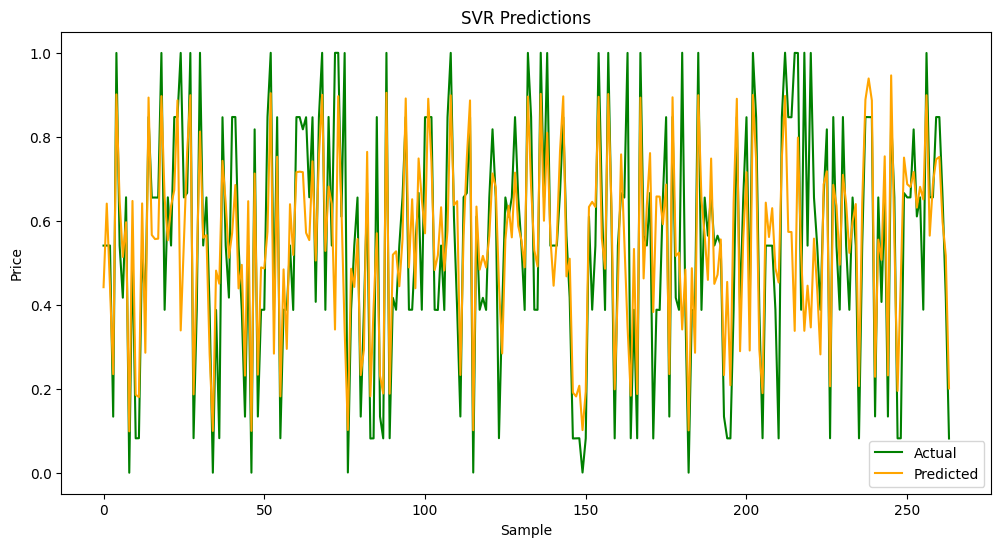

In [18]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='green')
plt.plot(y_pred, label='Predicted', color='orange')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('SVR Predictions')
plt.legend()
plt.show()